In [5]:
from fastai.vision import *
from fastai import *
import cv2
import os

In [6]:
bs = 16  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './strive-mask-dataset/'

In [7]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  3 classes:
 ['bad_mask', 'mask', 'no_mask']


In [8]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 5472 training images and 1367 validation images.


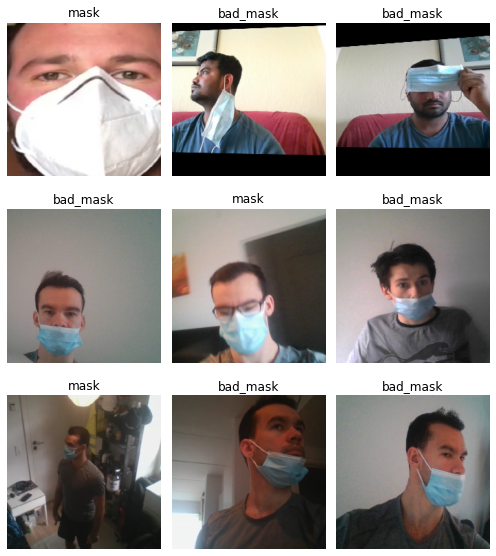

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
#learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
#learn.fit_one_cycle(10)

<class 'str'>
It is a bad_mask


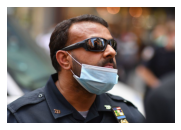

In [14]:
model = load_learner('./', 'export1.pkl')

path = './' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = model.predict(img)
print(type(str(pred_class)))
img.show()
print ("It is a", pred_class)

In [9]:
#learn.export(os.path.abspath('./export.pkl'))

In [36]:
model = load_learner('./', 'export1.pkl')
face_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')


cap = cv2.VideoCapture(0)

while (cap.isOpened()):
    _,frame = cap.read()
    frame1 = frame.copy()
    
    
    gray_frame = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    face_detect = face_classifier.detectMultiScale(gray_frame)
        
    
    t = torch.tensor(np.ascontiguousarray(np.flip(frame1, 2)).transpose(2,0,1)).float()/255
    img = Image(t)
    
    
    
    
    prediction, idx, probability = model.predict(img)
    
    if str(prediction) == 'no_mask':
        cv2.rectangle(frame, (15, 15), (200, 75), (0,0,255), -1)
        cv2.putText(frame, f'{prediction}', (30,50), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
    
    if str(prediction) == 'bad_mask':
        cv2.rectangle(frame, (15, 15), (200, 75), (0,255,255), -1)
        cv2.putText(frame, f'{prediction}', (30,50), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),3)
    
    
    if str(prediction) == 'mask':
        cv2.rectangle(frame, (15, 15), (125, 75), (0,255,0), -1)
        cv2.putText(frame, f'{prediction}', (30,50), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    
    
    
    cv2.imshow('test',frame)
    
    key = cv2.waitKey(100)
    if key == ord('q') or key == 27:
        break
        
        
cap.release()
cv2.destroyAllWindows()

In [34]:
model = load_learner('./', 'export1.pkl')
face_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(0)



frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
   
size = (frame_width, frame_height)

result = cv2.VideoWriter('mask_detection.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)






while (cap.isOpened()):
    _,frame = cap.read()
    frame1 = frame.copy()
    
    
    gray_frame = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    face_detect = face_classifier.detectMultiScale(gray_frame)
    
    #for x,y,w,h in face_detect:
        #cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
        
    
    t = torch.tensor(np.ascontiguousarray(np.flip(frame1, 2)).transpose(2,0,1)).float()/255
    img = Image(t)
    
    
    
    
    prediction, idx, probability = model.predict(img)
    
    
    if str(prediction) == 'no_mask':
        cv2.rectangle(frame, (15, 15), (200, 75), (0,0,255), -1)
        cv2.putText(frame, f'{prediction}', (30,50), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
    
    if str(prediction) == 'bad_mask':
        cv2.rectangle(frame, (15, 15), (200, 75), (0,255,255), -1)
        cv2.putText(frame, f'{prediction}', (30,50), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),3)
    
    
    if str(prediction) == 'mask':
        cv2.rectangle(frame, (15, 15), (125, 75), (0,255,0), -1)
        cv2.putText(frame, f'{prediction}', (30,50), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    
    
    
    #cv2.putText(frame, f'{prediction}', (20,20), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
    
    
    
    result.write(frame)
    
    cv2.imshow('test',frame)
    
    key = cv2.waitKey(100)
    if key == ord('q') or key == 27:
        break
        
        
cap.release()
result.release()
cv2.destroyAllWindows()